In [21]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from scipy import stats

In [22]:
# read the data
df = pd.read_csv('../data/airbnb_total.csv', index_col=0)

In [23]:
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x > 90 else 0)

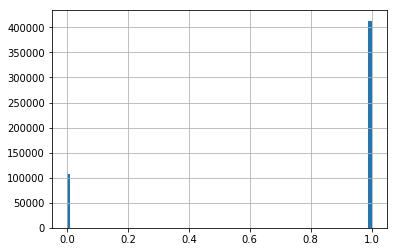

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
df['satisfaction'].hist(bins=100)

In [25]:
df.satisfaction.value_counts()

1    413292
0    107929
Name: satisfaction, dtype: int64

In [26]:
df.shape

(521221, 138)

In [27]:
seed = 7
array = df.values
X = array[:,0:137]
Y = array[:,137]
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [28]:
# set the scores
scoring = 'roc_auc'

In [29]:
# set the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append

<function list.append(object, /)>

In [30]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be c

LR: 0.669357 (0.059133)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.934800 (0.000681)
KNN: 0.647969 (0.001300)
CART: 0.782049 (0.001376)
NB: 0.620986 (0.001183)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increa

SVM: 0.784418 (0.031638)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/l

RF: 0.917993 (0.000740)


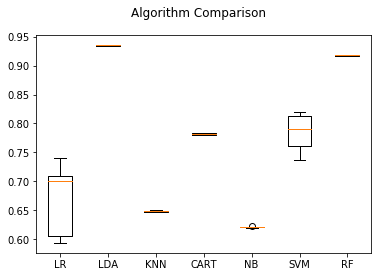

In [31]:
# save the models into a baseline algorithms png
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
fig.savefig('../reports/baseline-algorithms.png')

In [32]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia
0.7968988912984076

Matrix de Confusão

[[  1229  34222]
 [   712 135840]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.63      0.03      0.07     35451
         1.0       0.80      0.99      0.89    136552

   micro avg       0.80      0.80      0.80    172003
   macro avg       0.72      0.51      0.48    172003
weighted avg       0.76      0.80      0.72    172003



In [33]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Acurácia
0.8827927419870584

Matrix de Confusão

[[ 17579  17872]
 [  2288 134264]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.88      0.50      0.64     35451
         1.0       0.88      0.98      0.93    136552

   micro avg       0.88      0.88      0.88    172003
   macro avg       0.88      0.74      0.78    172003
weighted avg       0.88      0.88      0.87    172003



In [34]:
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)
predictions = knc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.7851839793491974

Matrix de Confusão

[[  8041  27410]
 [  9539 127013]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.46      0.23      0.30     35451
         1.0       0.82      0.93      0.87    136552

   micro avg       0.79      0.79      0.79    172003
   macro avg       0.64      0.58      0.59    172003
weighted avg       0.75      0.79      0.76    172003



In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.8521769969128445

Matrix de Confusão

[[ 23328  12123]
 [ 13303 123249]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65     35451
         1.0       0.91      0.90      0.91    136552

   micro avg       0.85      0.85      0.85    172003
   macro avg       0.77      0.78      0.78    172003
weighted avg       0.85      0.85      0.85    172003



In [36]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.21143235873792898

Matrix de Confusão

[[ 35156    295]
 [135341   1211]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.21      0.99      0.34     35451
         1.0       0.80      0.01      0.02    136552

   micro avg       0.21      0.21      0.21    172003
   macro avg       0.51      0.50      0.18    172003
weighted avg       0.68      0.21      0.08    172003



In [37]:
svn = LinearSVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia
0.8237065632576176

Matrix de Confusão

[[  8283  27168]
 [  3155 133397]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.72      0.23      0.35     35451
         1.0       0.83      0.98      0.90    136552

   micro avg       0.82      0.82      0.82    172003
   macro avg       0.78      0.61      0.63    172003
weighted avg       0.81      0.82      0.79    172003



In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Acurácia
0.8863857025749551

Matrix de Confusão

[[ 24451  11000]
 [  8542 128010]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71     35451
         1.0       0.92      0.94      0.93    136552

   micro avg       0.89      0.89      0.89    172003
   macro avg       0.83      0.81      0.82    172003
weighted avg       0.88      0.89      0.88    172003

